In [6]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
struc_data=pd.read_csv('/Users/lutz/Documents/german_federal_elections/output/structural_data.csv')
struc_data.drop(columns=['Unnamed: 0'], inplace=True, axis=0)

In [3]:
struc_data

,state,district_number,District_Name,Num_Municipalities,Area_km2,Total_Population,German_Population_Perc,Foreign_Population_Perc,Population_Density (IH per km2),Birth_Balance_Perc,...,Employees_Service_Perc,Employees_Other_Perc,SGB_II_Recipients_Total_Perc,SGB_II_Non_Employable_Perc,SGB_II_Foreigner_Perc,Unemployment_Rate_Total,Unemployment_Rate_Men,Unemployment_Rate_Women,Unemployment_Rate_Age_15_24,Unemployment_Rate_Age_55_64
0,Schleswig-Holstein,1,Flensburg – Schleswig,126.0,2124.3,291300.0,91.6,8.4,137.1,-0.27,...,15.4,36.7,7.68,26.1,28.2,7.0,7.7,6.2,5.9,7.6
1,Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,197.0,2777.9,235000.0,92.9,7.1,84.6,-0.52,...,11.8,32.7,5.91,26.1,23.8,6.5,6.9,5.9,5.4,7.2
2,Schleswig-Holstein,3,Steinburg – Dithmarschen Süd,178.0,2000.0,221000.0,93.5,6.5,110.5,-0.53,...,15.1,32.0,7.06,26.3,29.3,6.4,6.8,6.1,7.0,6.4
3,Schleswig-Holstein,4,Rendsburg-Eckernförde,163.0,2165.4,252100.0,94.5,5.5,116.4,-0.38,...,17.0,33.9,5.28,29.6,33.2,4.8,5.2,4.3,4.7,5.2
4,Schleswig-Holstein,5,Kiel,3.0,143.0,268800.0,88.6,11.4,1879.2,-0.08,...,24.8,38.9,12.52,26.8,35.1,8.4,9.2,7.4,5.1,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Baden-Württemberg,295,Zollernalb – Sigmaringen,40.0,1656.3,248800.0,87.7,12.3,150.2,-0.21,...,9.0,24.0,2.76,25.5,31.0,4.1,4.2,3.9,3.9,4.8
295,Saarland,296,Saarbrücken,6.0,325.7,271400.0,83.6,16.4,833.3,-0.40,...,25.1,32.6,13.18,26.9,42.6,10.3,11.4,9.2,8.1,9.2
296,Saarland,297,Saarlouis,18.0,893.2,262400.0,89.1,10.9,293.8,-0.58,...,13.8,25.9,5.50,26.3,40.4,5.7,6.2,5.0,3.7,5.9
297,Saarland,298,St. Wendel,16.0,802.0,212600.0,93.5,6.5,265.1,-0.65,...,14.6,30.6,6.96,27.6,40.6,6.3,6.7,5.8,5.3,6.1


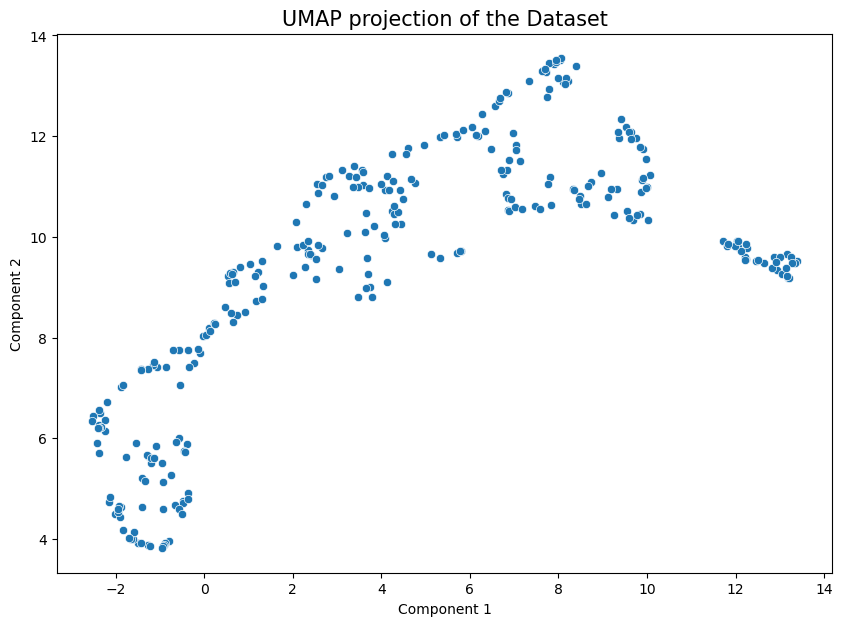

In [7]:


# Assume that you have a DataFrame df
df = struc_data.iloc[:,3:]
# Create a UMAP instance
reducer = umap.UMAP(random_state=42)

# Fit the data and transform it into 2 dimensions
embedding = reducer.fit_transform(df)

# Create a pandas DataFrame from the reduced data for easy plotting
embedding_df = pd.DataFrame(embedding, columns=['Component 1', 'Component 2'])

# Use seaborn to create a scatterplot of the reduced data
plt.figure(figsize=(10, 7))
sns.scatterplot(data=embedding_df, x='Component 1', y='Component 2')
plt.title('UMAP projection of the Dataset', fontsize=15)
plt.show()


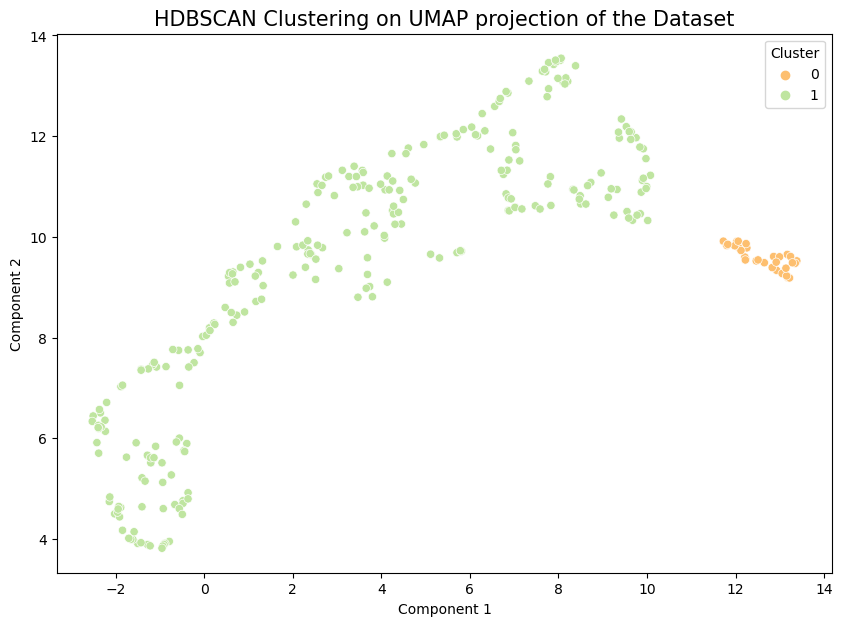

In [8]:
import hdbscan

# Create an HDBSCAN instance
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)

# Fit the data and predict cluster labels
labels = clusterer.fit_predict(embedding)

# Add the cluster labels to the embedding DataFrame
embedding_df['Cluster'] = labels

# Use seaborn to create a scatterplot of the reduced data with cluster colors
plt.figure(figsize=(10, 7))
sns.scatterplot(data=embedding_df, x='Component 1', y='Component 2', hue='Cluster', palette='Spectral', legend="full")
plt.title('HDBSCAN Clustering on UMAP projection of the Dataset', fontsize=15)
plt.show()
